In [1]:
import tensorflow.keras as keras
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM,Dense

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import datetime

I study my work follwed [Jason Brownlee's blogs](https://machinelearningmastery.com/time-series-forecasting-long-short-term-memory-network-python/)

## dataset and prepare

[shampoo sales Dataset](https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv) 

In [2]:
data_dir = 'H:/ML/airline-passenger.csv'
data = pd.read_csv(data_dir)

In [3]:
print(data.shape)
data.head()

(144, 2)


,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


### time series methods


the training size will be [n_examples, window_length, features]

In [4]:
## split a timeseries data to segmentm each window_length of data is input and the next data is output (
# (single input, single output, multiple timestep inputs)
def collect_month_data(month_list, begin_in_number, window_length):
    return [int(month_list[begin_in_number +i][-2:]) for i in range(0,window_length)]

def datasplit(df,window_length = 24, multiple_series= False):
    useful_data = df.Passengers.values
    x_train = []
    y_train = []
    series = []
    for i in range(0,len(useful_data)-window_length):
        x_train.append(useful_data[i:i+window_length])
        y_train.append(useful_data[i+window_length])
        if multiple_series:
            series.append(collect_month_data(df.Month.values, i, window_length))
    if multiple_series:
        return np.array(x_train), np.array(y_train),np.array(series)
    return np.array(x_train), np.array(y_train)

In [5]:
X,y,series1 = datasplit(data,24,multiple_series= True)
newX = np.append(X, series1.reshape(-1,24), axis=1)
x_train, x_test, y_train, y_test = train_test_split(newX, y, test_size=0.33, random_state=42)


In [6]:
x_train.shape

(80, 48)

In [7]:
series1_train = x_train[:,-24:]
series1_test = x_test[:,-24:]
x_train = x_train[:,:-24]
x_test = x_test[:,:-24]

In [8]:
series1_train.shape

(80, 24)

### window method(not useful compared to time series method)

This is accurally some kinds of **regression methods**, for example, if we want to predict value at time [t], we may input value in time [t-1],
[t-2], [t-3] parallel as the input variable, so it is some kind of regression problem \
the number of previous step parallel variables in the length of window \ 
the training size will be [all_time_series, 1, n_variables] \
for example if we have 144 time steps and each has passenger number and month, if we want the window length to be 10, the x_train in shape [144,1,10] (10 previous variable with a month variable)

- this is helpful for the problem that data sample has different time series

In [201]:
df_time_series = data.copy()
df_time_series.loc[:,'Month'] = df_time_series.apply(lambda row:int(row.Month[-2:]) , axis=1)


In [204]:
x__time_series = df_time_series.values

In [206]:
x_time_series = x_train_time_series.reshape()

(144, 2)

## Build a RNN LSTM model by Keras
typically there are three type of RNN models, selerated by :
1. LSTM models for univariate time series forecasting
2. LSTM models for multivariate time series forecasting.
3. LSTM models for multi-steps time series forecasting.


### important notes:
1. input of the model, x_train has three dimension, [seamples,timesteps,features]
2. 

### tensorboard setup

In [31]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
    pass

# Load the TensorBoard notebook extension
%load_ext tensorboard

### Vanilla LSTM

In [9]:
# define model
# n_steps: number of steps    n_features: input demension
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(24, 1)))
model.add(Dense(5))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50)                10400     
_________________________________________________________________
dense (Dense)                (None, 5)                 255       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6         
Total params: 10,661
Trainable params: 10,661
Non-trainable params: 0
_________________________________________________________________


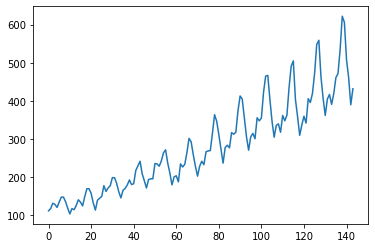

In [11]:
plt.plot(data.Passengers)

In [27]:
log_dir = r'H:\ML\Study-note-and-algorithm-implement-for-machine-learning-and-deep-learning\DeepLearning\RNN\logs' + '\\'+ datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
#log_dir = '.\\logs\\fit' + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1,profile_batch=0)

In [28]:
x_train = x_train.reshape(-1,24,1)
x_test = x_test.reshape(-1,24,1)
print(x_train.shape)
history = model.fit(x_train,y_train,epochs=200,batch_size=4, validation_data=(x_test, y_test),callbacks=[tensorboard_callback])

(80, 24, 1)
Train on 80 samples, validate on 40 samples
Epoch 1/200
80/80 [==============================] - 0s 4ms/sample - loss: 333.0514 - val_loss: 718.8868
Epoch 2/200
80/80 [==============================] - 0s 3ms/sample - loss: 718.5961 - val_loss: 785.1777
Epoch 3/200
80/80 [==============================] - 0s 2ms/sample - loss: 470.1847 - val_loss: 326.1678
Epoch 4/200
80/80 [==============================] - 0s 3ms/sample - loss: 522.8266 - val_loss: 412.2589
Epoch 5/200
80/80 [==============================] - 0s 3ms/sample - loss: 458.8015 - val_loss: 380.2564
Epoch 6/200
80/80 [==============================] - 0s 2ms/sample - loss: 353.0915 - val_loss: 382.6794
Epoch 7/200
80/80 [==============================] - 0s 3ms/sample - loss: 301.0208 - val_loss: 330.9653
Epoch 8/200
80/80 [==============================] - 0s 3ms/sample - loss: 323.0623 - val_loss: 357.0973
Epoch 9/200
80/80 [==============================] - 0s 3ms/sample - loss: 305.4873 - val_loss: 554.4988

Epoch 78/200
80/80 [==============================] - 0s 3ms/sample - loss: 263.5755 - val_loss: 482.0737
Epoch 79/200
80/80 [==============================] - 0s 2ms/sample - loss: 356.5035 - val_loss: 602.5118
Epoch 80/200
80/80 [==============================] - 0s 3ms/sample - loss: 289.8065 - val_loss: 398.7891
Epoch 81/200
80/80 [==============================] - 0s 2ms/sample - loss: 350.9854 - val_loss: 481.7856
Epoch 82/200
80/80 [==============================] - 0s 2ms/sample - loss: 345.3495 - val_loss: 1059.8943
Epoch 83/200
80/80 [==============================] - 0s 2ms/sample - loss: 355.5380 - val_loss: 403.1732
Epoch 84/200
80/80 [==============================] - 0s 3ms/sample - loss: 563.1984 - val_loss: 818.9281
Epoch 85/200
80/80 [==============================] - 0s 2ms/sample - loss: 829.9265 - val_loss: 1533.1648
Epoch 86/200
80/80 [==============================] - 0s 2ms/sample - loss: 737.9945 - val_loss: 550.0252
Epoch 87/200
80/80 [========================

Epoch 155/200
80/80 [==============================] - 0s 3ms/sample - loss: 539.5496 - val_loss: 584.1126
Epoch 156/200
80/80 [==============================] - 0s 4ms/sample - loss: 392.0464 - val_loss: 868.1701
Epoch 157/200
80/80 [==============================] - 0s 3ms/sample - loss: 614.4371 - val_loss: 698.8342
Epoch 158/200
80/80 [==============================] - 0s 2ms/sample - loss: 449.7186 - val_loss: 516.4691
Epoch 159/200
80/80 [==============================] - 0s 2ms/sample - loss: 428.5346 - val_loss: 628.7036
Epoch 160/200
80/80 [==============================] - 0s 3ms/sample - loss: 433.2730 - val_loss: 510.2553
Epoch 161/200
80/80 [==============================] - 0s 3ms/sample - loss: 310.3437 - val_loss: 486.2504
Epoch 162/200
80/80 [==============================] - 0s 2ms/sample - loss: 449.7015 - val_loss: 1189.7700
Epoch 163/200
80/80 [==============================] - 0s 2ms/sample - loss: 506.6117 - val_loss: 1666.2792
Epoch 164/200
80/80 [==============

In [37]:
%tensorboard --logdir=./

Reusing TensorBoard on port 6006 (pid 20648), started 0:00:29 ago. (Use '!kill 20648' to kill it.)

In [213]:
x_input = x_test.reshape(len(x_test),24,1)
model.predict(x_input)

array([[249.19086],
       [257.7159 ],
       [166.75966],
       [315.30408],
       [206.3923 ],
       [313.13306],
       [345.6886 ],
       [181.61363],
       [254.77887],
       [428.1362 ],
       [205.77057],
       [283.09964],
       [177.64243],
       [241.93124],
       [400.81253],
       [441.03412],
       [466.2638 ],
       [152.85432],
       [417.75336],
       [421.81607],
       [314.78735],
       [264.97647],
       [242.38864],
       [314.07764],
       [263.2839 ],
       [181.0688 ],
       [195.26218],
       [443.54602],
       [384.74854],
       [389.91882],
       [214.04214],
       [370.0515 ],
       [212.15604],
       [394.79883],
       [306.82623],
       [461.40775],
       [240.6633 ],
       [256.32922],
       [460.65033],
       [181.59212]], dtype=float32)

In [214]:
y_test

array([259, 229, 172, 347, 236, 318, 301, 146, 234, 405, 230, 317, 166,
       204, 435, 505, 391, 145, 363, 463, 374, 229, 272, 271, 302, 171,
       181, 622, 355, 342, 196, 465, 172, 360, 312, 419, 264, 315, 390,
       162], dtype=int64)

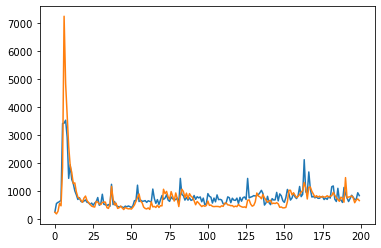

In [196]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])

In [ ]:
history

### stacked LSTM

1. It contains Multiple hidden LSTM layers stacked one on top of another.
2. need to set **return_sequences=True** argument on the previous LSTM layer to have 3D output from hidden LSTM layer as input to the next.


In [64]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(24, 1)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [65]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 5, 50)             10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [66]:
x_train = x_train.reshape(-1,5,1)
print(x_train.shape)
model.fit(x_train,y_train,epochs=200)

(20, 5, 1)
Train on 20 samples
Epoch 1/200
20/20 [==============================] - 2s 78ms/sample - loss: 126490.8516
Epoch 2/200
20/20 [==============================] - 0s 199us/sample - loss: 122080.0156
Epoch 3/200
20/20 [==============================] - 0s 249us/sample - loss: 119341.8984
Epoch 4/200
20/20 [==============================] - 0s 247us/sample - loss: 116845.6250
Epoch 5/200
20/20 [==============================] - 0s 198us/sample - loss: 114212.3516
Epoch 6/200
20/20 [==============================] - 0s 249us/sample - loss: 111245.6641
Epoch 7/200
20/20 [==============================] - 0s 251us/sample - loss: 108011.5469
Epoch 8/200
20/20 [==============================] - 0s 249us/sample - loss: 104793.1719
Epoch 9/200
20/20 [==============================] - 0s 249us/sample - loss: 101478.4219
Epoch 10/200
20/20 [==============================] - 0s 299us/sample - loss: 97970.3203
Epoch 11/200
20/20 [==============================] - 0s 249us/sample - loss: 94

Epoch 94/200
20/20 [==============================] - 0s 199us/sample - loss: 1086.4250
Epoch 95/200
20/20 [==============================] - 0s 150us/sample - loss: 1032.9775
Epoch 96/200
20/20 [==============================] - 0s 199us/sample - loss: 916.4745
Epoch 97/200
20/20 [==============================] - 0s 199us/sample - loss: 677.5516
Epoch 98/200
20/20 [==============================] - 0s 199us/sample - loss: 703.9664
Epoch 99/200
20/20 [==============================] - 0s 199us/sample - loss: 832.5697
Epoch 100/200
20/20 [==============================] - 0s 249us/sample - loss: 1649.7200
Epoch 101/200
20/20 [==============================] - 0s 199us/sample - loss: 1442.5243
Epoch 102/200
20/20 [==============================] - 0s 249us/sample - loss: 1251.1293
Epoch 103/200
20/20 [==============================] - 0s 199us/sample - loss: 1171.4211
Epoch 104/200
20/20 [==============================] - 0s 249us/sample - loss: 1085.1041
Epoch 105/200
20/20 [==========

Epoch 188/200
20/20 [==============================] - 0s 249us/sample - loss: 17.5836
Epoch 189/200
20/20 [==============================] - 0s 249us/sample - loss: 16.4011
Epoch 190/200
20/20 [==============================] - 0s 299us/sample - loss: 15.6302
Epoch 191/200
20/20 [==============================] - 0s 249us/sample - loss: 14.7704
Epoch 192/200
20/20 [==============================] - 0s 249us/sample - loss: 14.3276
Epoch 193/200
20/20 [==============================] - 0s 349us/sample - loss: 13.6012
Epoch 194/200
20/20 [==============================] - 0s 249us/sample - loss: 12.8551
Epoch 195/200
20/20 [==============================] - 0s 299us/sample - loss: 12.1008
Epoch 196/200
20/20 [==============================] - 0s 249us/sample - loss: 11.5092
Epoch 197/200
20/20 [==============================] - 0s 249us/sample - loss: 10.8248
Epoch 198/200
20/20 [==============================] - 0s 249us/sample - loss: 10.1626
Epoch 199/200
20/20 [======================

In [188]:
x_input = x_test.reshape(len(x_test),5,1)
model.predict(x_input)

ValueError: cannot reshape array of size 960 into shape (40,5,1)

In [ ]:
y_test

## Multiple Input Series

1. multiple input time series and one output time series
2. n_feature is the number of input, n_step for different series should be the same

In [143]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(5, 2)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [144]:
newX_train = np.append(x_train.reshape(-1,5,1),series1_train.reshape(-1,5,1),axis=2)

In [147]:
model.fit(newX_train,y_train,epochs = 200,batch_size=3)

Train on 20 samples
Epoch 1/200
20/20 [==============================] - 0s 898us/sample - loss: 2.6732
Epoch 2/200
20/20 [==============================] - 0s 848us/sample - loss: 818.8872
Epoch 3/200
20/20 [==============================] - 0s 947us/sample - loss: 9165.2220
Epoch 4/200
20/20 [==============================] - 0s 849us/sample - loss: 3899.5241
Epoch 5/200
20/20 [==============================] - 0s 996us/sample - loss: 10055.8649
Epoch 6/200
20/20 [==============================] - 0s 997us/sample - loss: 15121.5497
Epoch 7/200
20/20 [==============================] - 0s 898us/sample - loss: 10945.9807
Epoch 8/200
20/20 [==============================] - 0s 897us/sample - loss: 4630.6106
Epoch 9/200
20/20 [==============================] - 0s 798us/sample - loss: 5132.8139
Epoch 10/200
20/20 [==============================] - 0s 798us/sample - loss: 4469.4182
Epoch 11/200
20/20 [==============================] - 0s 798us/sample - loss: 3743.3709
Epoch 12/200
20/20 [==

20/20 [==============================] - 0s 798us/sample - loss: 877.2550
Epoch 186/200
20/20 [==============================] - 0s 798us/sample - loss: 882.2104
Epoch 187/200
20/20 [==============================] - 0s 748us/sample - loss: 945.5962
Epoch 188/200
20/20 [==============================] - 0s 798us/sample - loss: 915.7379
Epoch 189/200
20/20 [==============================] - 0s 798us/sample - loss: 882.6285
Epoch 190/200
20/20 [==============================] - 0s 748us/sample - loss: 870.4874
Epoch 191/200
20/20 [==============================] - 0s 1ms/sample - loss: 867.1824
Epoch 192/200
20/20 [==============================] - 0s 798us/sample - loss: 884.2114
Epoch 193/200
20/20 [==============================] - 0s 947us/sample - loss: 829.8753
Epoch 194/200
20/20 [==============================] - 0s 748us/sample - loss: 902.7969
Epoch 195/200
20/20 [==============================] - 0s 748us/sample - loss: 873.9099
Epoch 196/200
20/20 [===========================

In [128]:
model.predict( np.append(x_test.reshape(-1,5,1),series1_test.reshape(-1,5,1),axis=2))

array([[561.5067 ],
       [334.98807],
       [366.68448],
       [313.4111 ],
       [283.27234],
       [335.96375],
       [644.1371 ],
       [483.67175],
       [253.67291],
       [213.09311],
       [262.7602 ]], dtype=float32)

In [129]:
y_test

array([682. , 289.9, 401.3, 264.5, 149.5, 210.1, 581.3, 437.4, 287. ,
       168.5, 122.9])

In [151]:
newX_test = np.append(x_test.reshape(-1,5,1),series1_test.reshape(-1,5,1),axis=2)
history = model.fit(newX_train, y_train, epochs=100, batch_size=3,validation_data=(newX_test, y_test), verbose=2, shuffle=False)
# plot history

Train on 20 samples, validate on 11 samples
Epoch 1/100
20/20 - 0s - loss: 479.1569 - val_loss: 7855.5958
Epoch 2/100
20/20 - 0s - loss: 493.2213 - val_loss: 8264.6036
Epoch 3/100
20/20 - 0s - loss: 463.9344 - val_loss: 8539.4822
Epoch 4/100
20/20 - 0s - loss: 416.6423 - val_loss: 9597.0468
Epoch 5/100
20/20 - 0s - loss: 378.6250 - val_loss: 9837.2243
Epoch 6/100
20/20 - 0s - loss: 556.0151 - val_loss: 8609.5414
Epoch 7/100
20/20 - 0s - loss: 506.3156 - val_loss: 8167.7989
Epoch 8/100
20/20 - 0s - loss: 489.5028 - val_loss: 8308.3277
Epoch 9/100
20/20 - 0s - loss: 481.6026 - val_loss: 8204.5758
Epoch 10/100
20/20 - 0s - loss: 463.7742 - val_loss: 8356.5007
Epoch 11/100
20/20 - 0s - loss: 460.0164 - val_loss: 8465.0291
Epoch 12/100
20/20 - 0s - loss: 450.0353 - val_loss: 8374.8852
Epoch 13/100
20/20 - 0s - loss: 391.8727 - val_loss: 10982.7271
Epoch 14/100
20/20 - 0s - loss: 2478.4288 - val_loss: 6281.8124
Epoch 15/100
20/20 - 0s - loss: 8652.4183 - val_loss: 8941.3422
Epoch 16/100
20/2

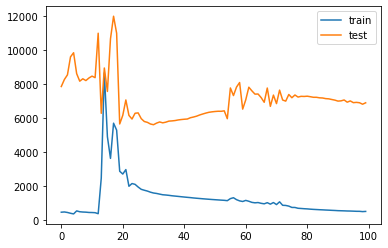

In [152]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()